Test VAE model on random frame of random file in `record`

In [4]:
import numpy as np
import os
import json
import tensorflow as tf
import random
from vae.vae import ConvVAE, reset_graph
from model import make_model

In [2]:
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, edgeitems=6, linewidth=100, suppress=True)

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"]="" # disable GPU
ROOT = '/data/cvfs/ah2029/datasets/gym/carracing/'

DATA_DIR = os.path.join(ROOT, 'record_from_trained_baseline')
model_path_name = os.path.join(ROOT, 'tf_vae')

beta_vae_name = 'beta5_rtd_vae.json'
z_size=32

In [4]:
vae = ConvVAE(z_size=z_size,
              batch_size=1,
              is_training=False,
              reuse=False,
              gpu_mode=False)

vae.load_json(os.path.join(model_path_name, 'baseline_vae.json'))

beta_vae = ConvVAE(z_size=z_size,
              batch_size=1,
              is_training=False,
              reuse=False,
              gpu_mode=False)

vae.load_json(os.path.join(model_path_name, beta_vae_name))
beta_vae.load_json(os.path.join(model_path_name, beta_vae_name))

INFO:tensorflow:Model using cpu.
INFO:tensorflow:Model using cpu.


### Compare disentanglement

In [5]:
filelist = os.listdir(DATA_DIR)

In [11]:
obs = np.load(os.path.join(DATA_DIR, random.choice(filelist)))["obs"]
obs = obs.astype(np.float32)/255.0

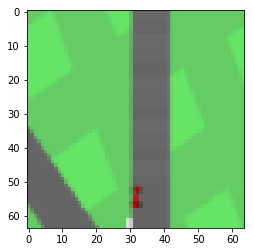

In [12]:
# show recorded frame that will be fed into the input of VAE
frame = random.choice(obs).reshape(1, 64, 64, 3)
plt.imshow(frame[0])

In [13]:
def plot_latent_variations(frame, vae, factor=0):
    batch_z = vae.encode_mu_logvar(frame)[0]#vae.encode(frame)
    print('Latent vector z')
    print(batch_z[0]) # print out sampled z
    reconstruct = vae.decode(batch_z)
    
    plt.figure(figsize=((10, 5)))
    plt.subplot(121)
    plt.imshow(frame[0])
    plt.title('Original')
    # show reconstruction
    plt.subplot(122)
    plt.imshow(reconstruct[0])
    plt.title('Reconstruction')
    plt.show()

    print('Visualise latent factor {}, original value={:.2f}'.format(factor, batch_z[0][factor]))
    batch_z_copy = batch_z.copy()
    plt.figure(figsize=(20, 5))
    for i, value in enumerate(np.linspace(-1.5, 1.5, 10)):
        batch_z_copy[0, factor] = value
        reconstruct = vae.decode(batch_z_copy)
        # show reconstruction
        plt.subplot(1, 10, i+1)
        plt.imshow(reconstruct[0])
        plt.title('{:.2f}'.format(value))
    plt.show()

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


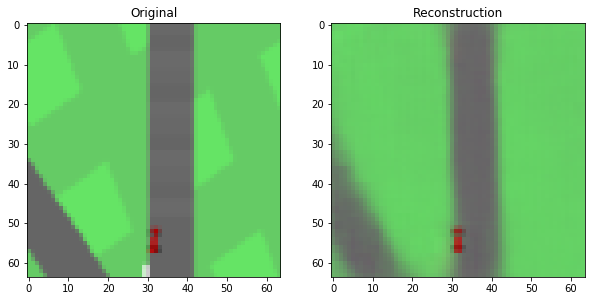

Visualise latent factor 0, original value=0.02


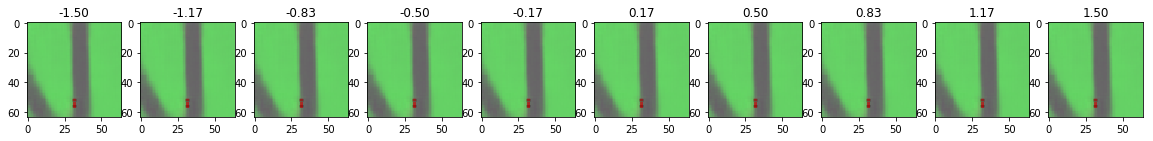

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


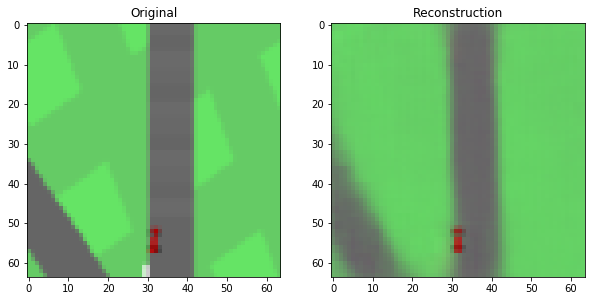

Visualise latent factor 1, original value=0.01


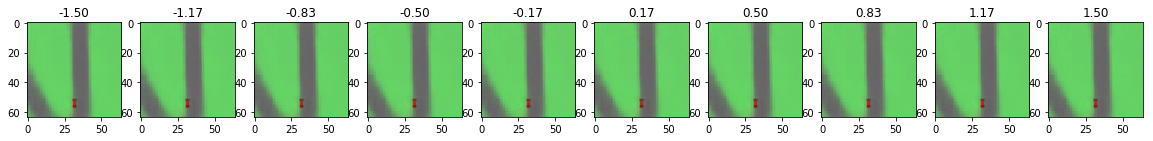

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


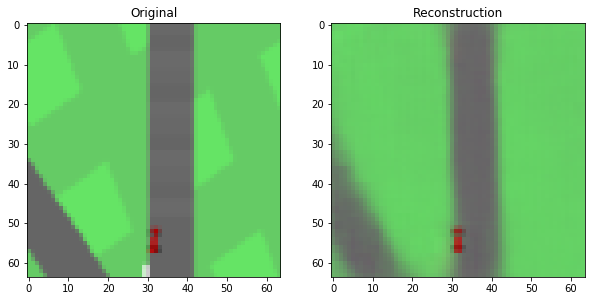

Visualise latent factor 2, original value=-0.02


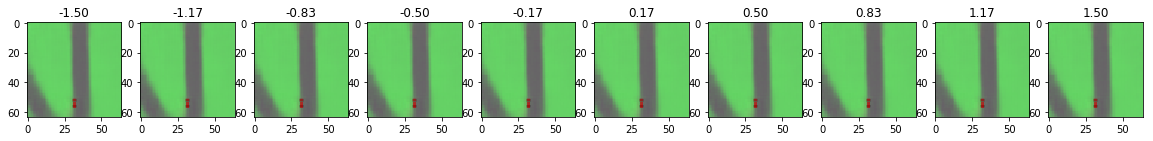

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


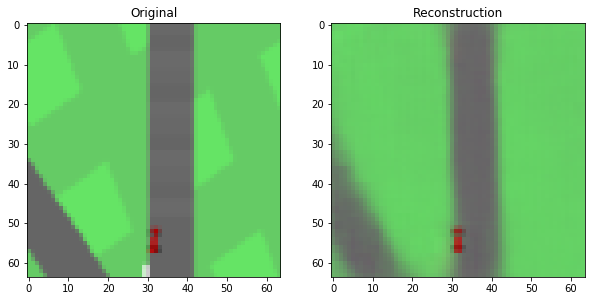

Visualise latent factor 3, original value=0.00


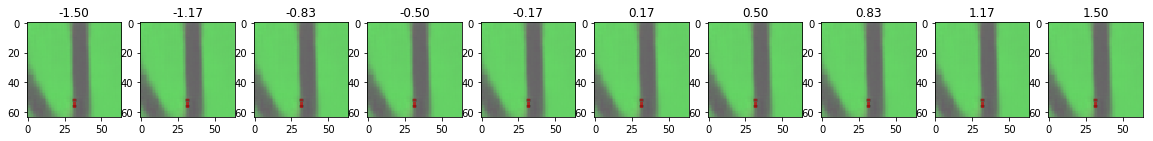

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


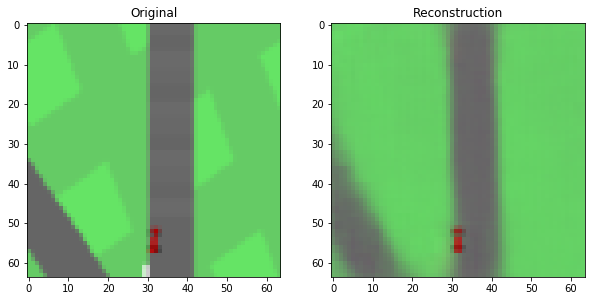

Visualise latent factor 4, original value=-0.02


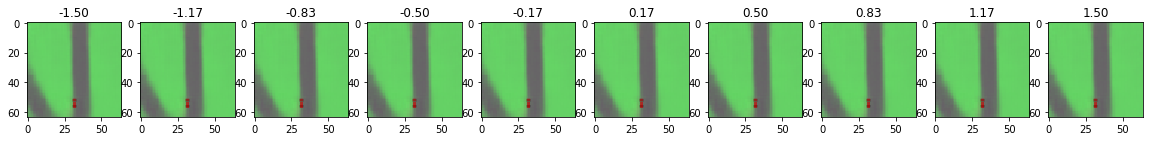

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


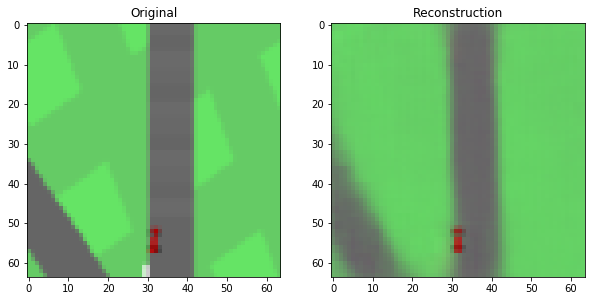

Visualise latent factor 5, original value=0.01


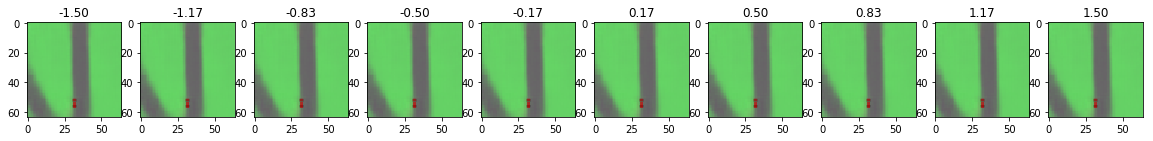

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


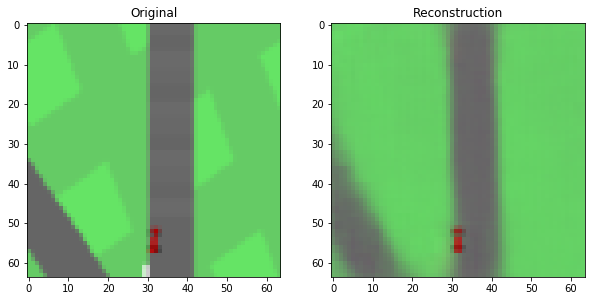

Visualise latent factor 6, original value=-0.00


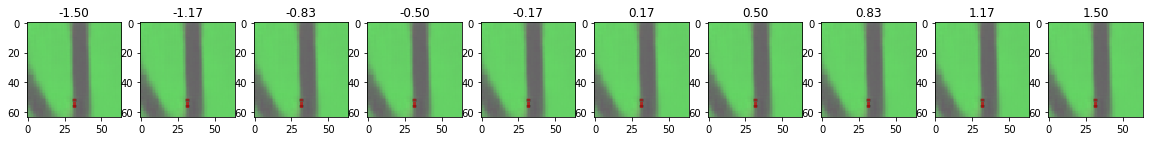

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


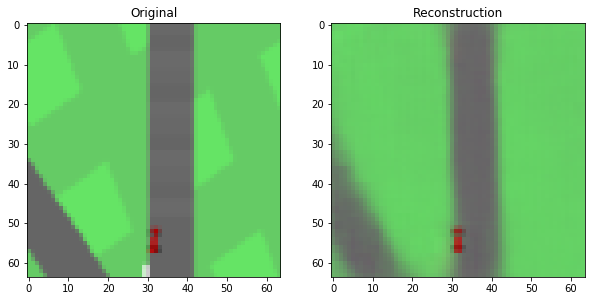

Visualise latent factor 7, original value=-0.49


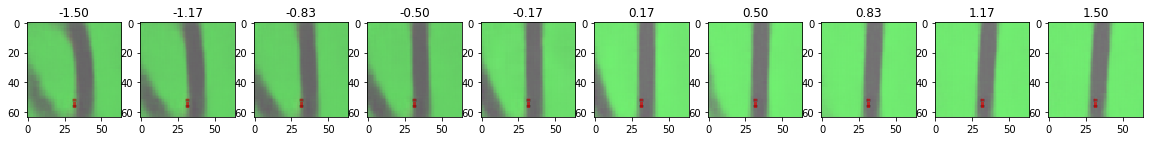

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


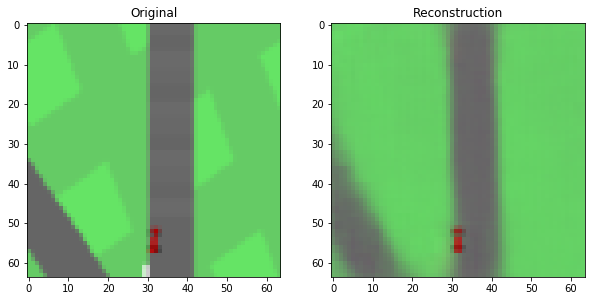

Visualise latent factor 8, original value=1.08


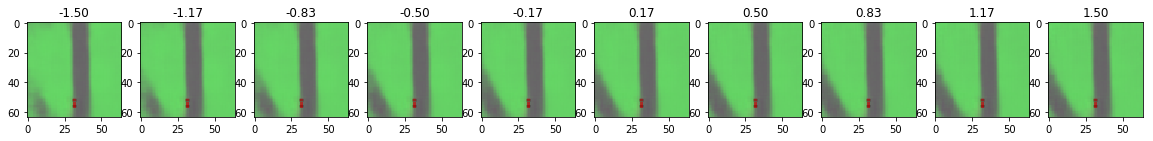

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


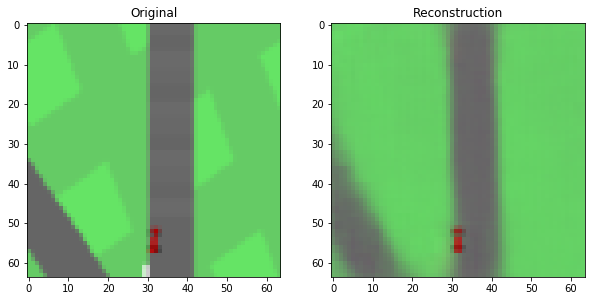

Visualise latent factor 9, original value=-0.01


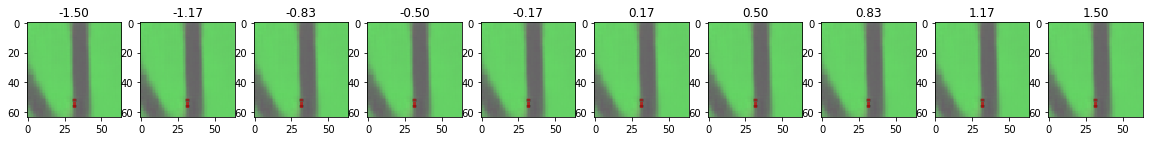

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


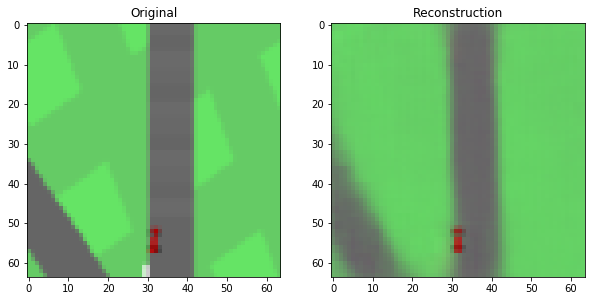

Visualise latent factor 10, original value=0.01


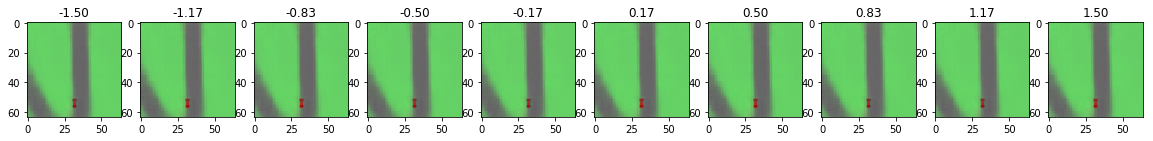

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


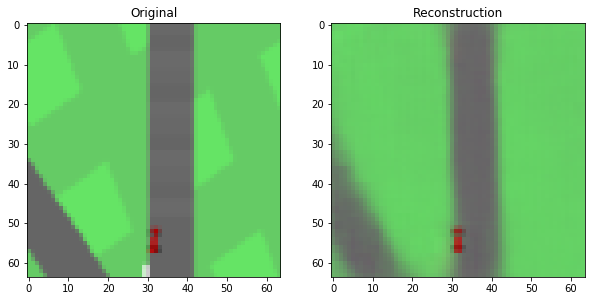

Visualise latent factor 11, original value=0.00


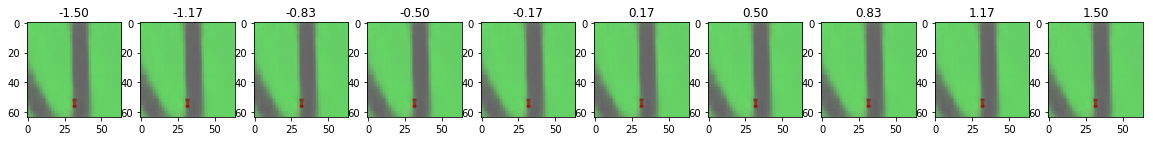

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


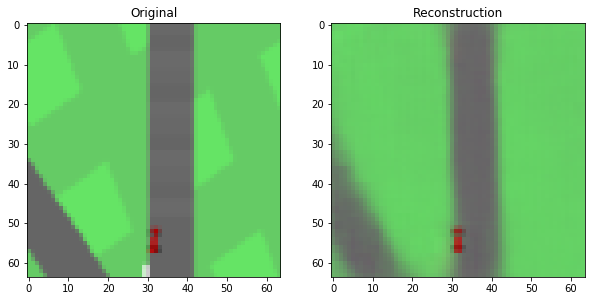

Visualise latent factor 12, original value=-0.00


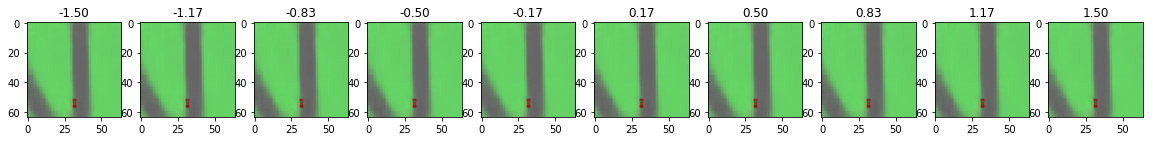

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


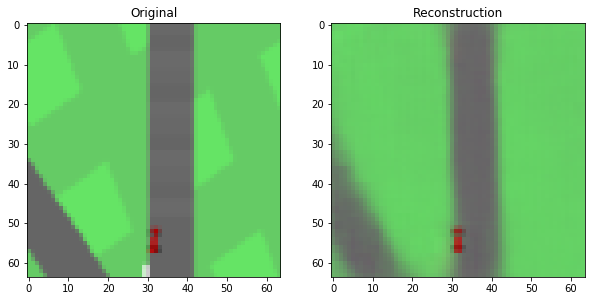

Visualise latent factor 13, original value=2.22


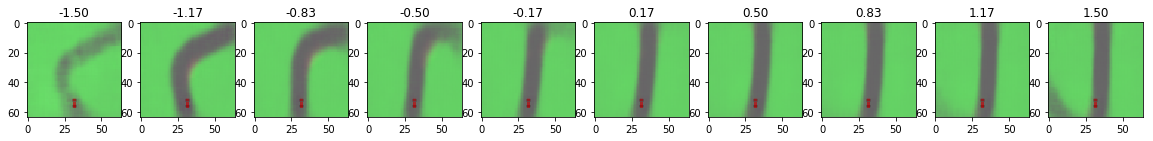

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


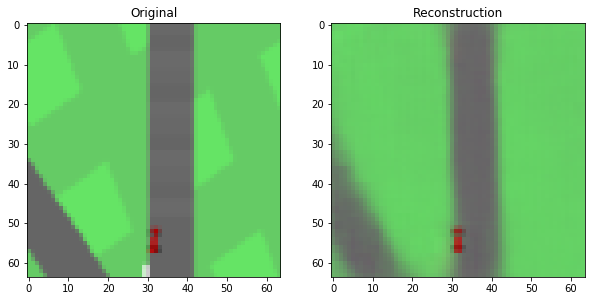

Visualise latent factor 14, original value=0.01


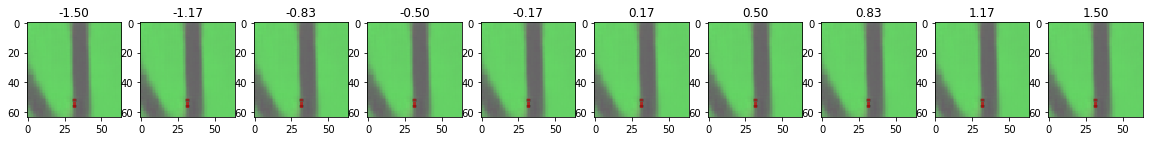

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


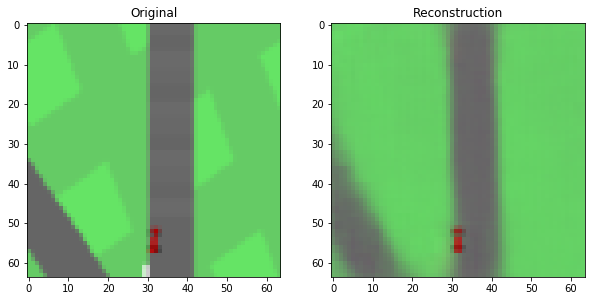

Visualise latent factor 15, original value=-0.00


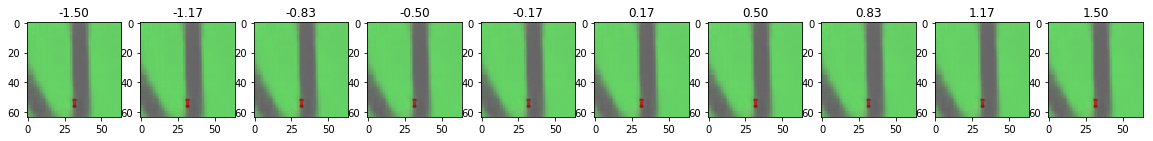

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


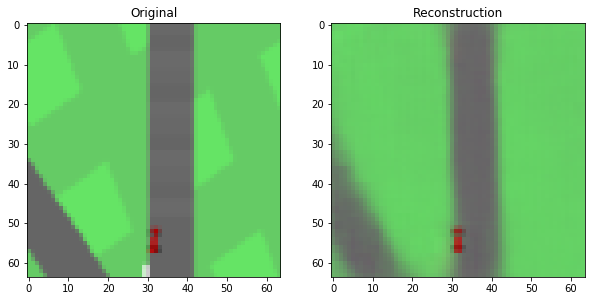

Visualise latent factor 16, original value=0.65


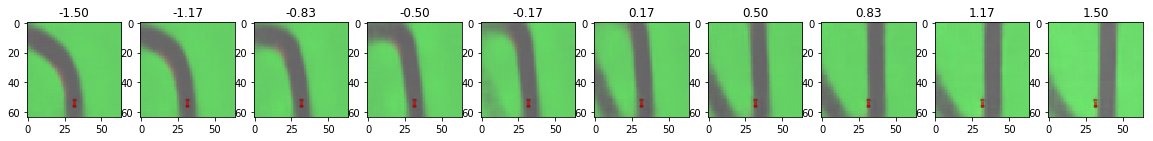

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


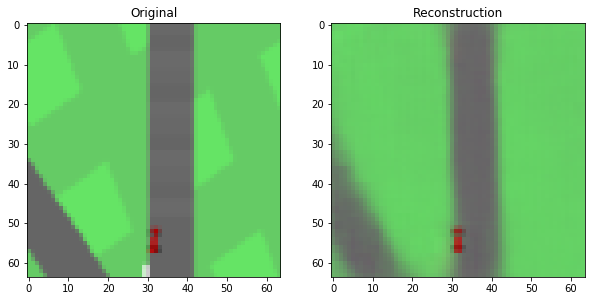

Visualise latent factor 17, original value=0.01


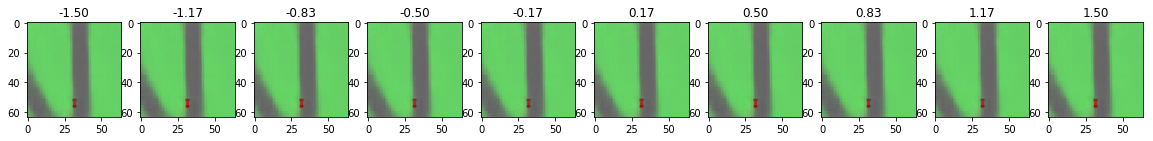

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


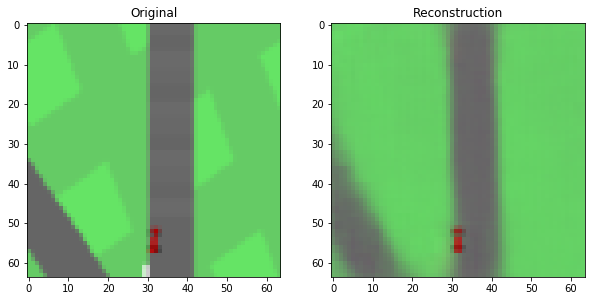

Visualise latent factor 18, original value=-0.03


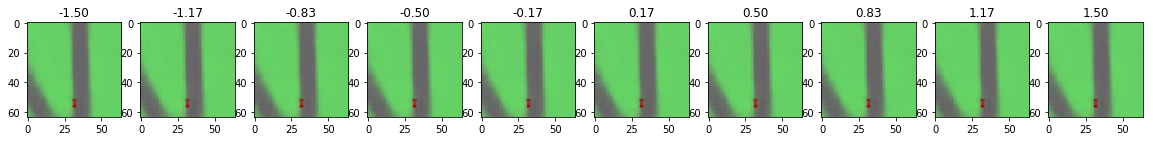

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


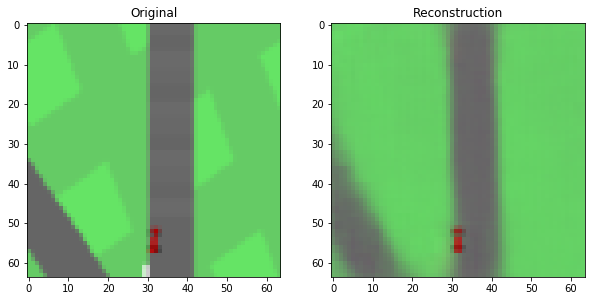

Visualise latent factor 19, original value=0.01


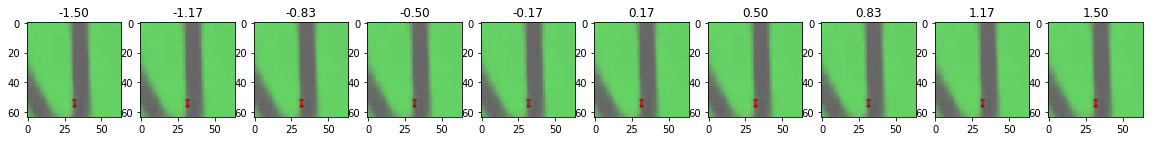

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


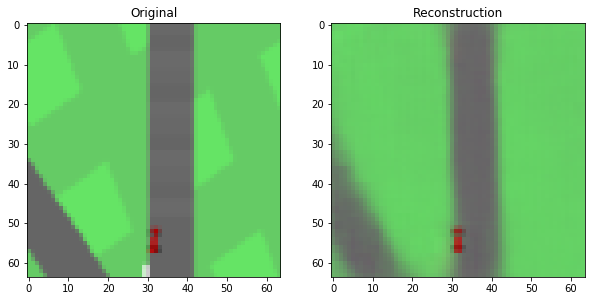

Visualise latent factor 20, original value=-0.00


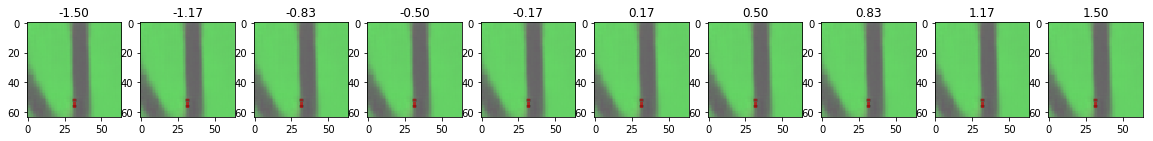

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


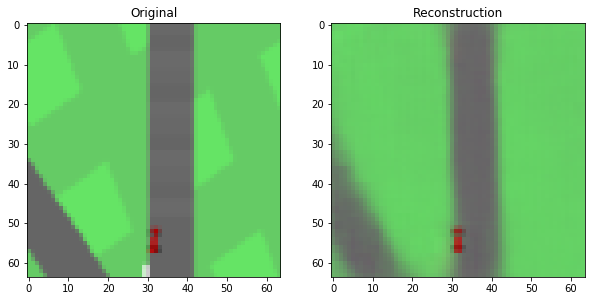

Visualise latent factor 21, original value=-0.04


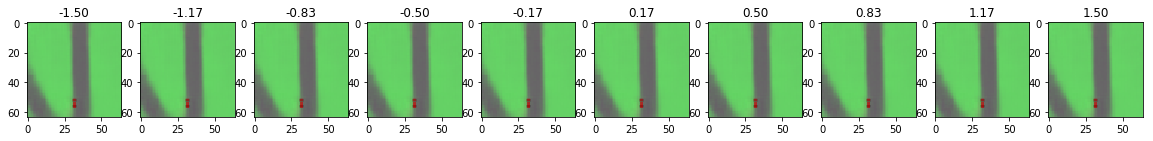

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


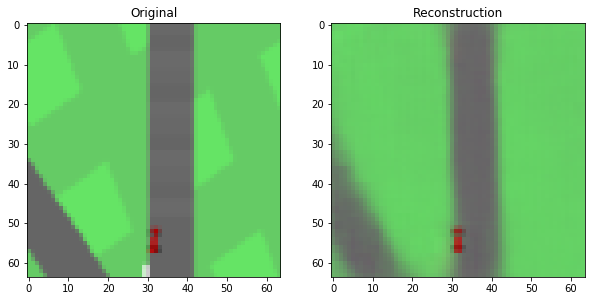

Visualise latent factor 22, original value=0.01


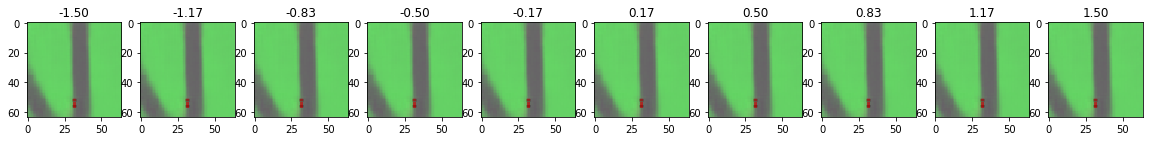

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


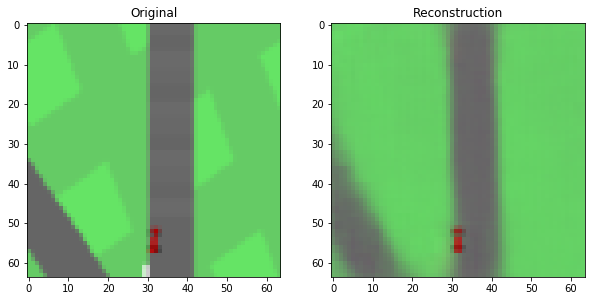

Visualise latent factor 23, original value=0.01


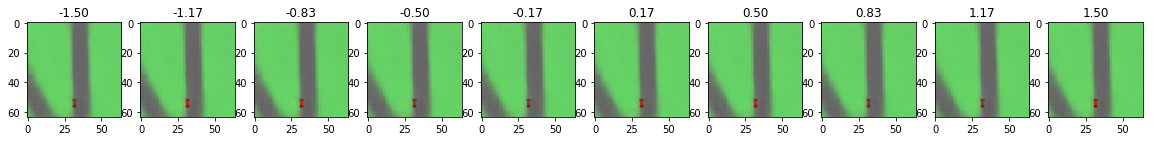

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


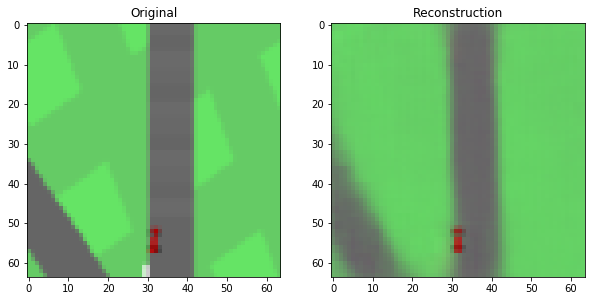

Visualise latent factor 24, original value=0.01


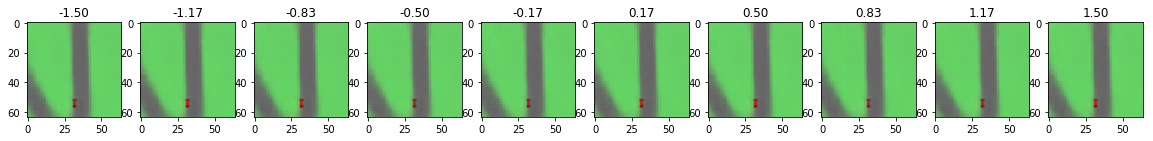

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


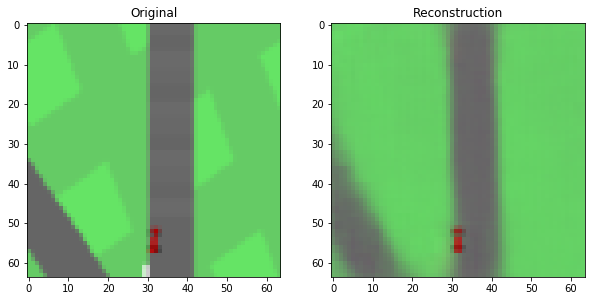

Visualise latent factor 25, original value=0.01


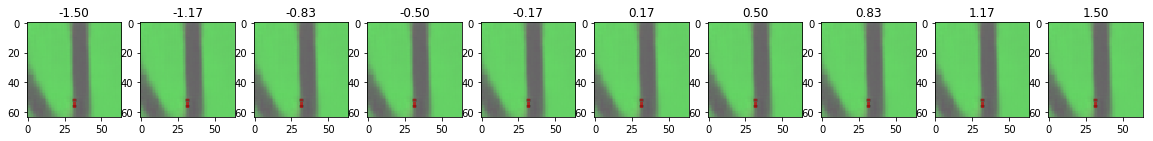

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


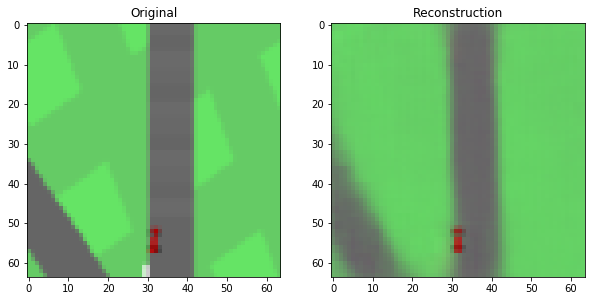

Visualise latent factor 26, original value=-0.01


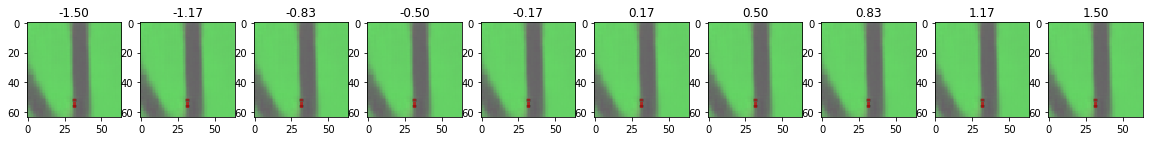

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


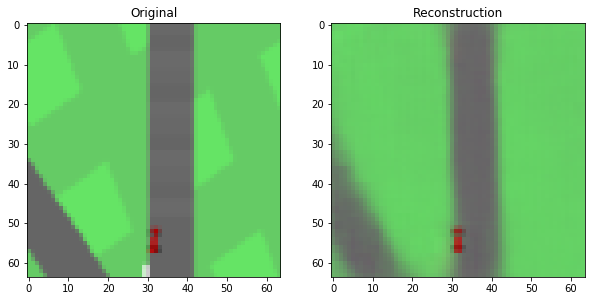

Visualise latent factor 27, original value=0.08


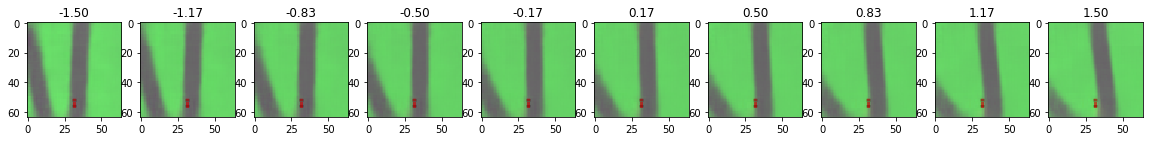

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


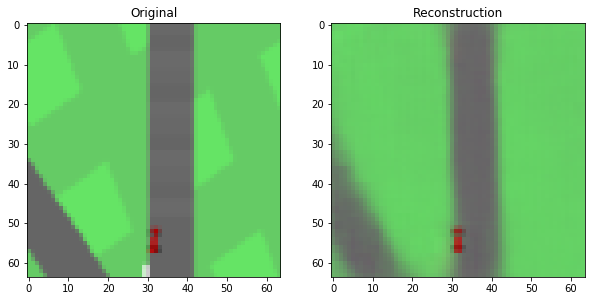

Visualise latent factor 28, original value=0.04


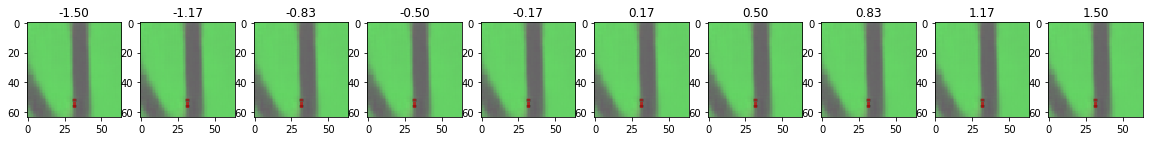

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


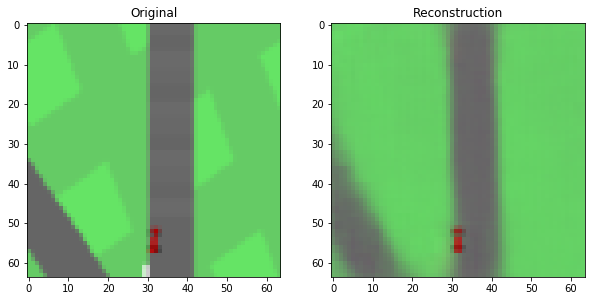

Visualise latent factor 29, original value=-0.02


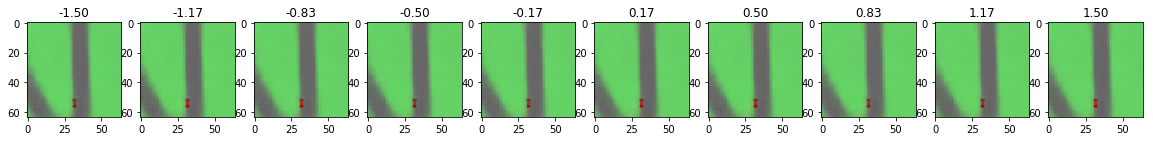

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


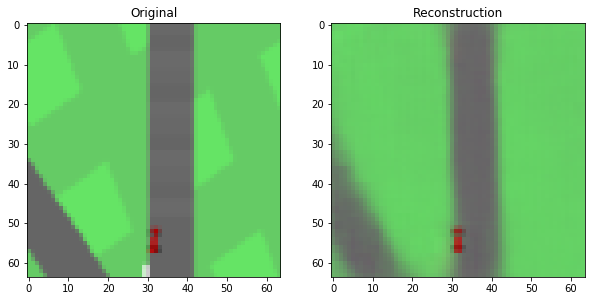

Visualise latent factor 30, original value=0.03


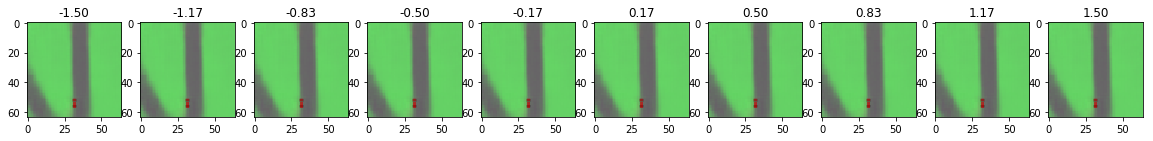

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


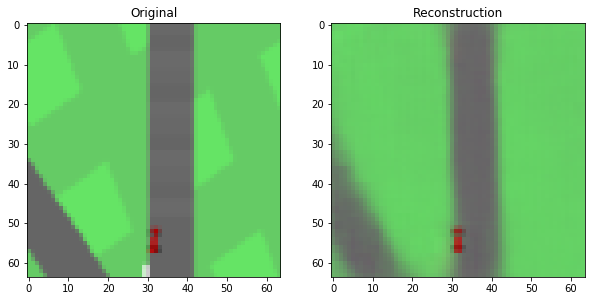

Visualise latent factor 31, original value=-0.03


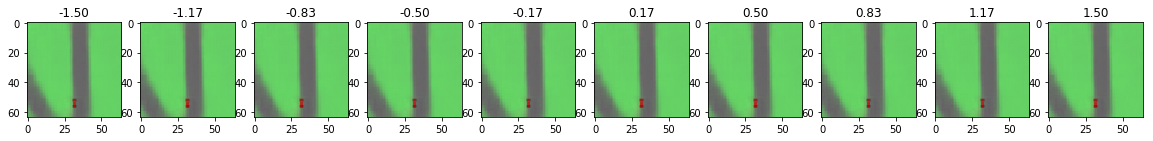

In [16]:
for i in range(32):
    plot_latent_variations(frame, vae, factor=i)

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


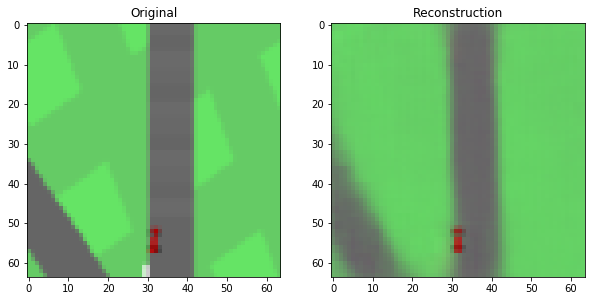

Visualise latent factor 0, original value=0.02


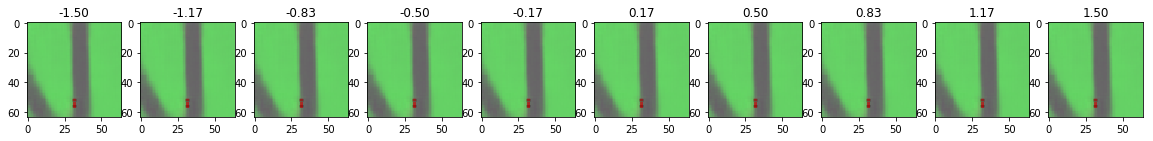

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


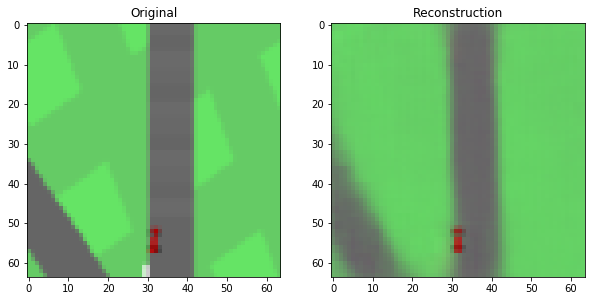

Visualise latent factor 1, original value=0.01


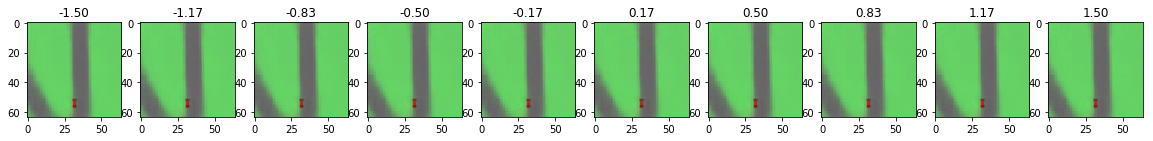

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


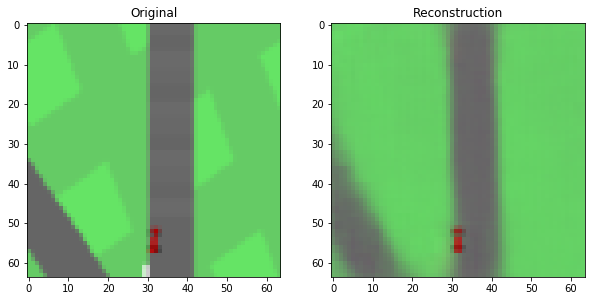

Visualise latent factor 2, original value=-0.02


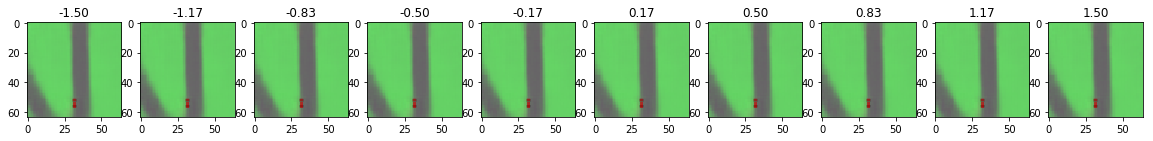

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


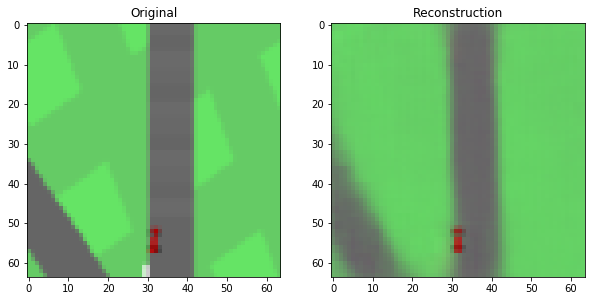

Visualise latent factor 3, original value=0.00


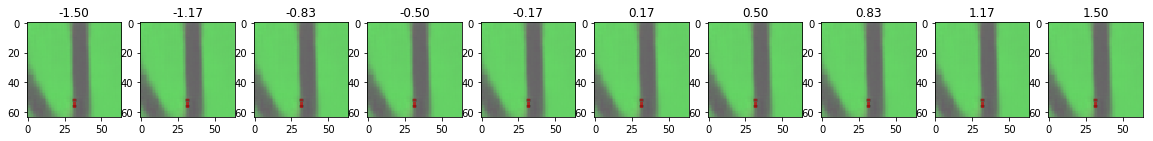

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


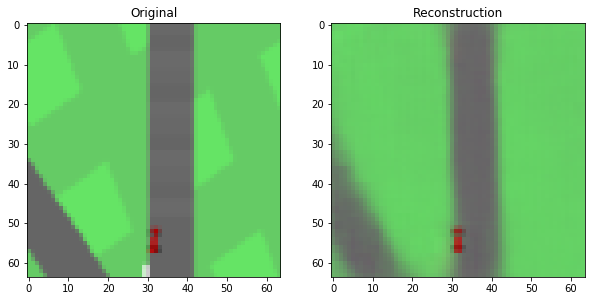

Visualise latent factor 4, original value=-0.02


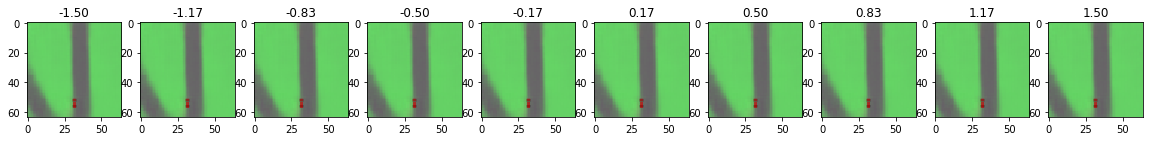

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


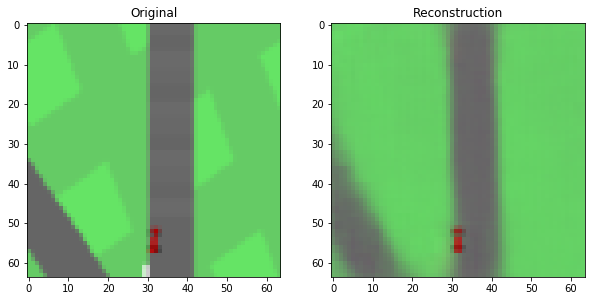

Visualise latent factor 5, original value=0.01


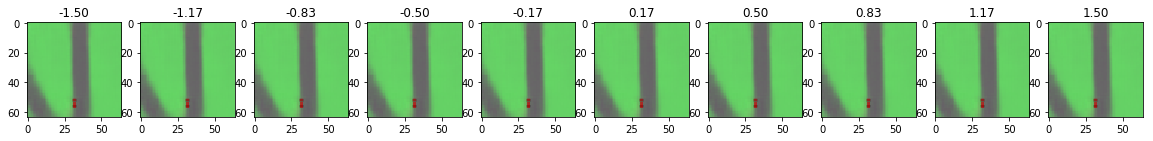

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


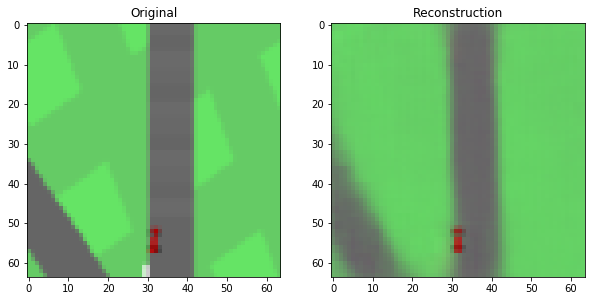

Visualise latent factor 6, original value=-0.00


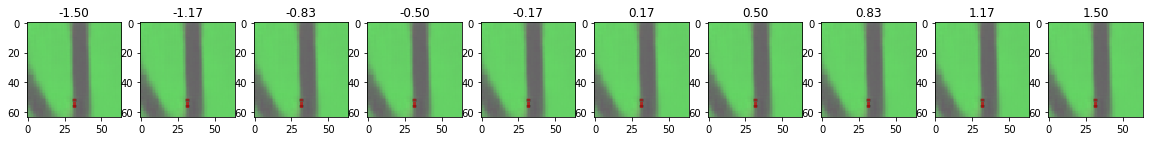

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


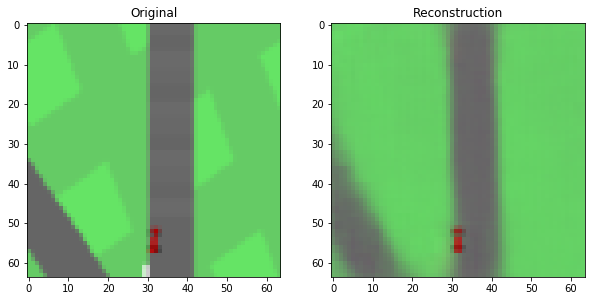

Visualise latent factor 7, original value=-0.49


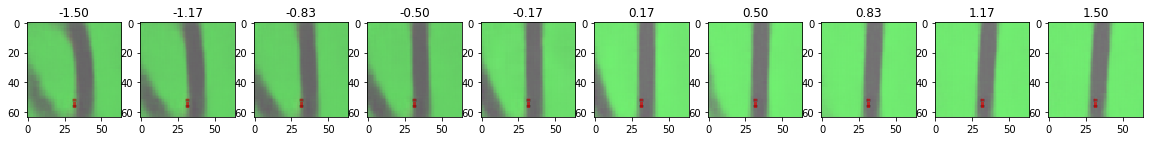

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


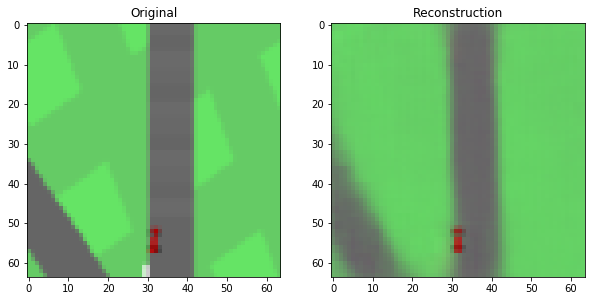

Visualise latent factor 8, original value=1.08


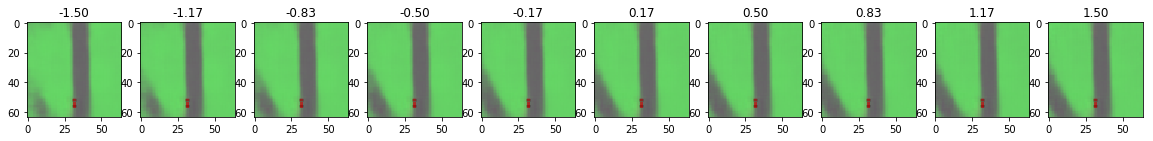

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


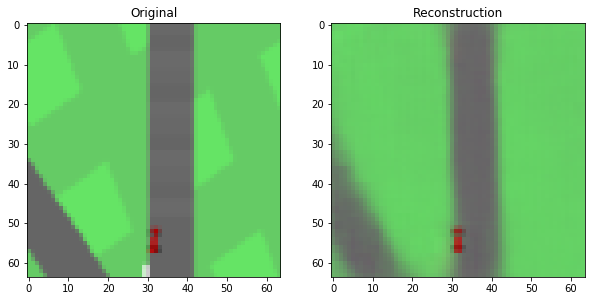

Visualise latent factor 9, original value=-0.01


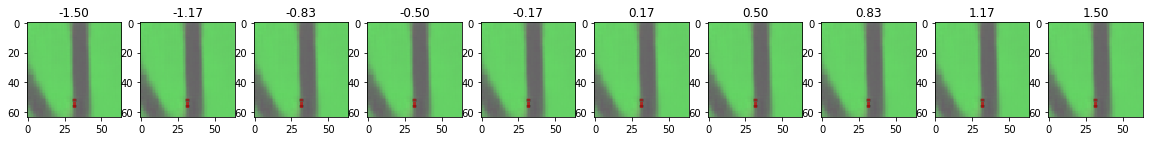

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


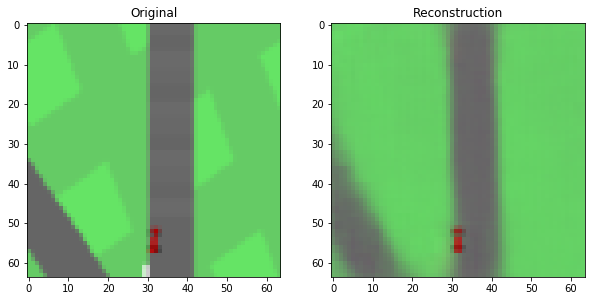

Visualise latent factor 10, original value=0.01


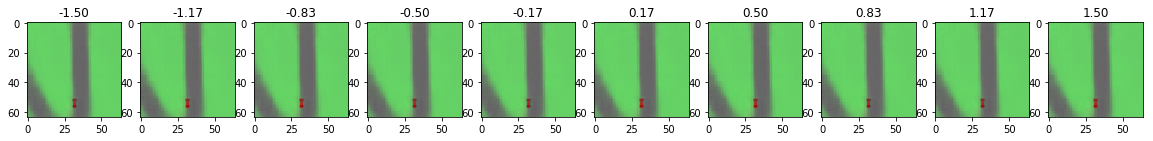

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


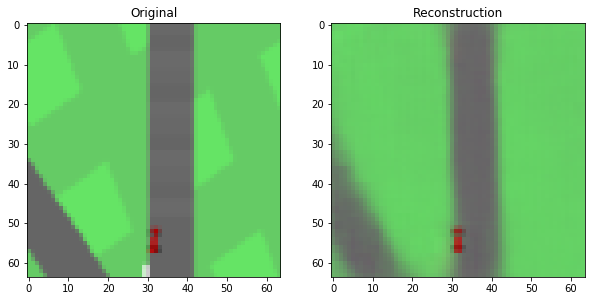

Visualise latent factor 11, original value=0.00


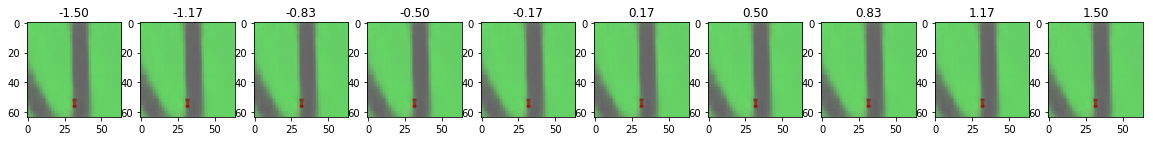

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


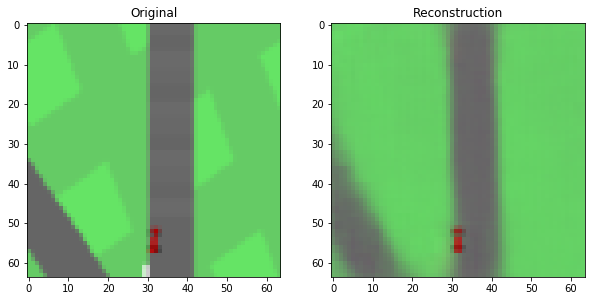

Visualise latent factor 12, original value=-0.00


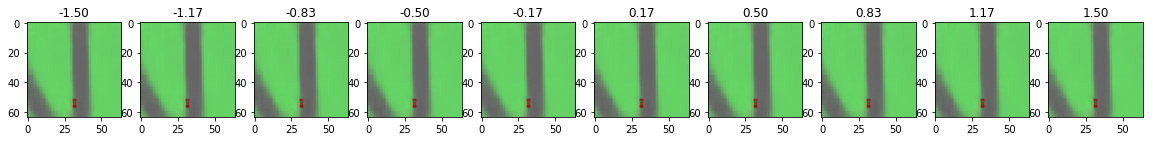

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


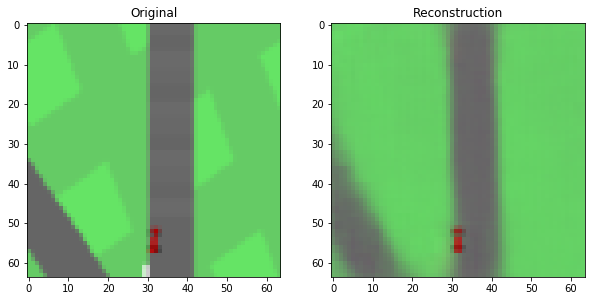

Visualise latent factor 13, original value=2.22


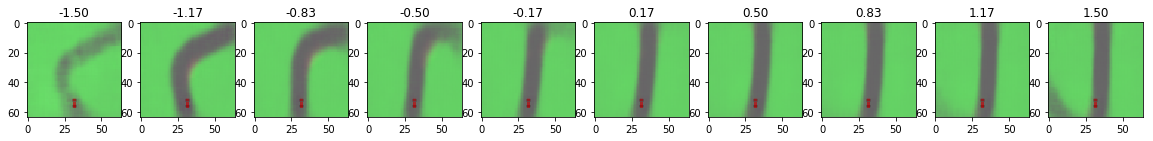

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


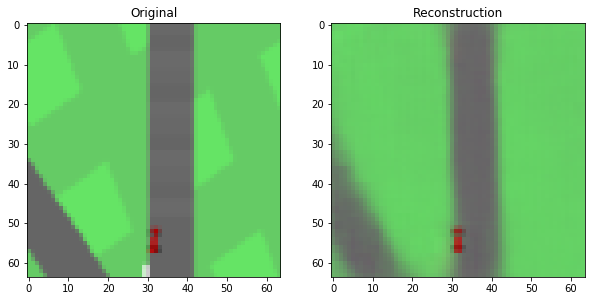

Visualise latent factor 14, original value=0.01


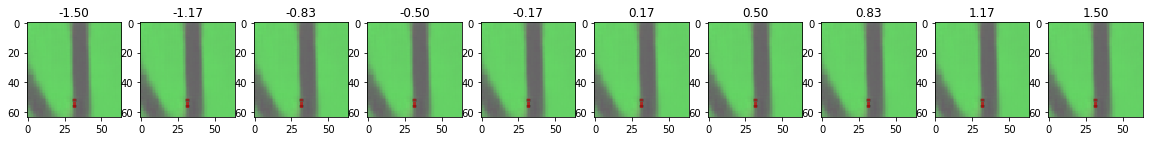

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


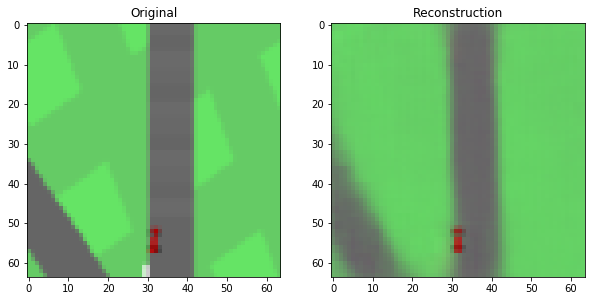

Visualise latent factor 15, original value=-0.00


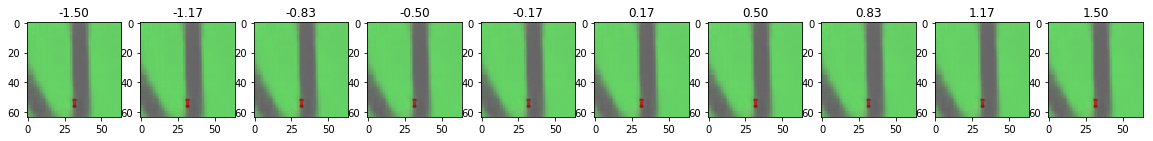

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


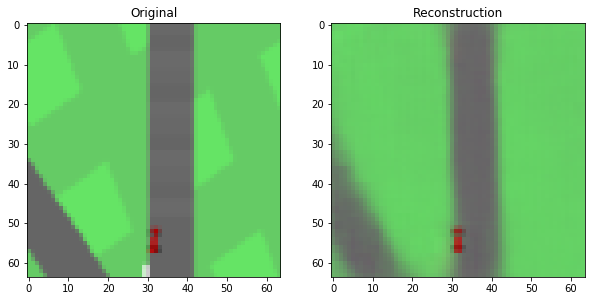

Visualise latent factor 16, original value=0.65


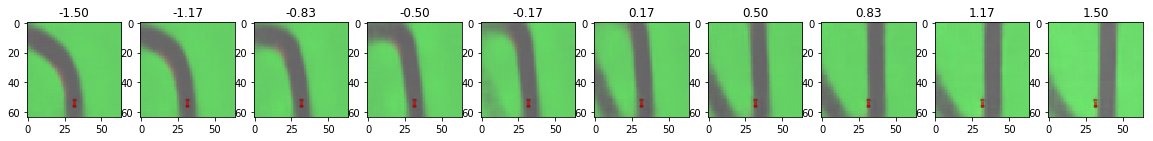

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


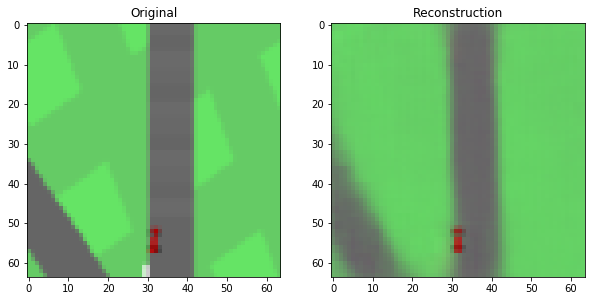

Visualise latent factor 17, original value=0.01


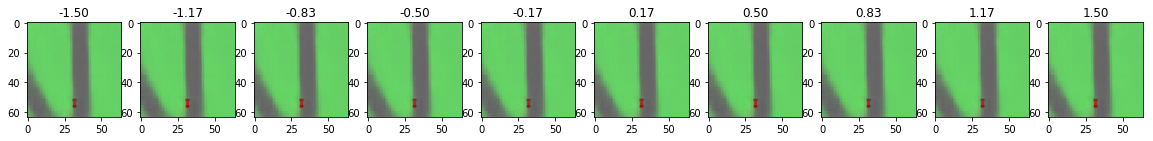

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


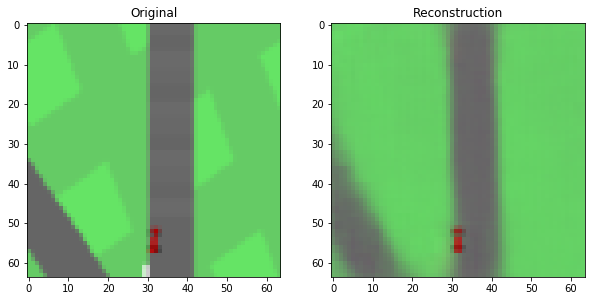

Visualise latent factor 18, original value=-0.03


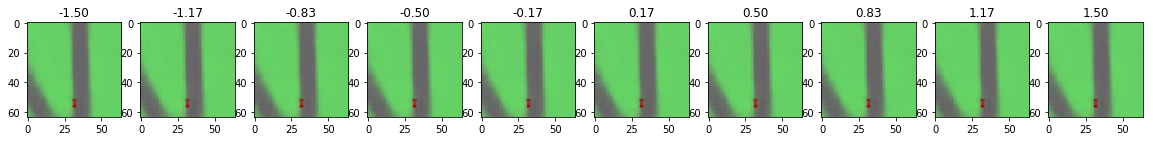

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


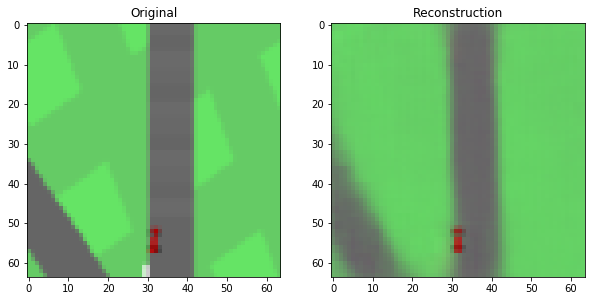

Visualise latent factor 19, original value=0.01


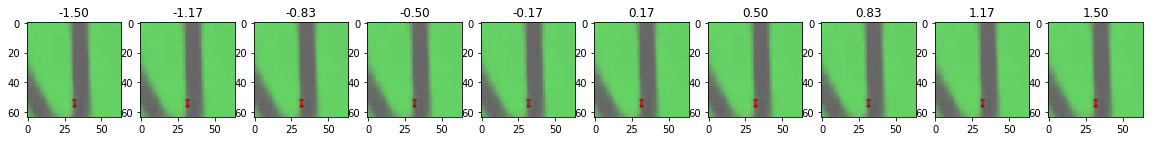

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


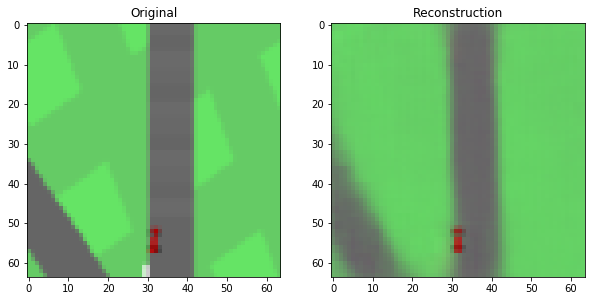

Visualise latent factor 20, original value=-0.00


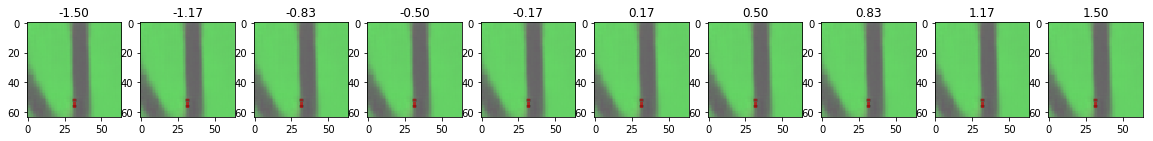

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


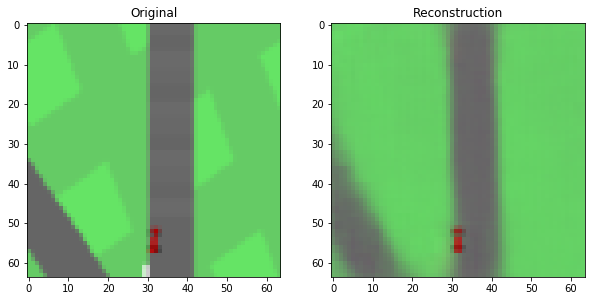

Visualise latent factor 21, original value=-0.04


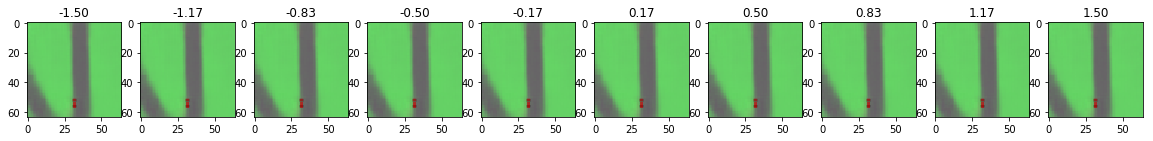

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


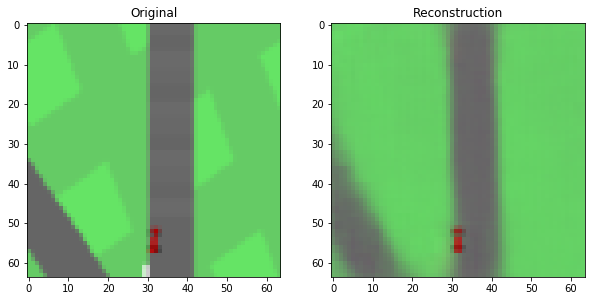

Visualise latent factor 22, original value=0.01


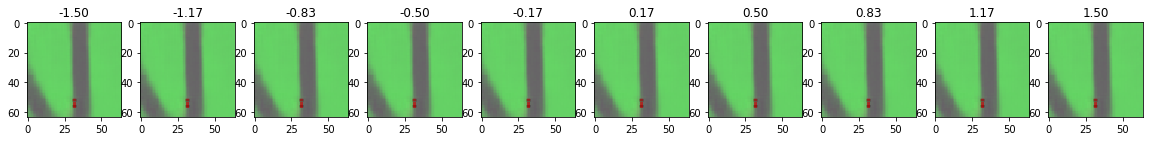

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


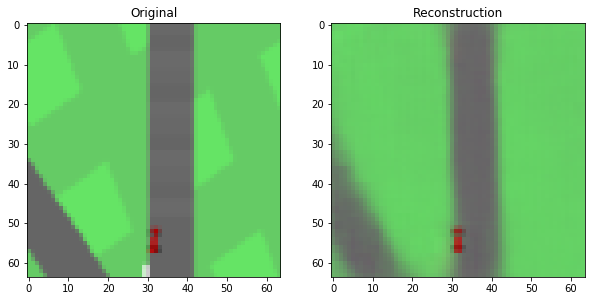

Visualise latent factor 23, original value=0.01


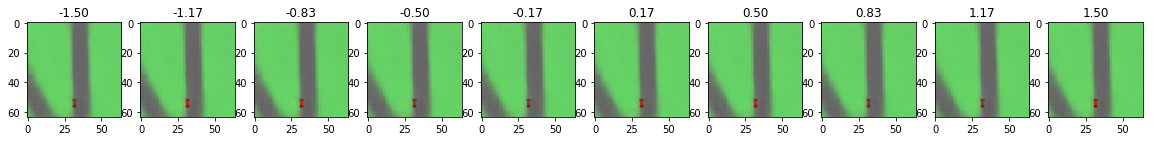

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


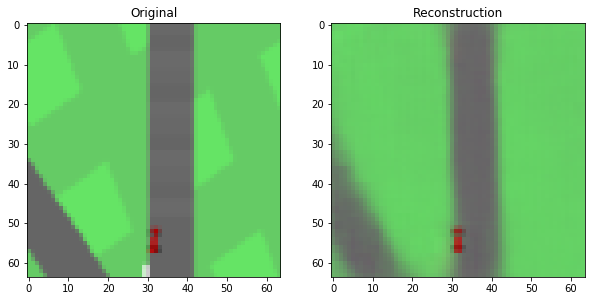

Visualise latent factor 24, original value=0.01


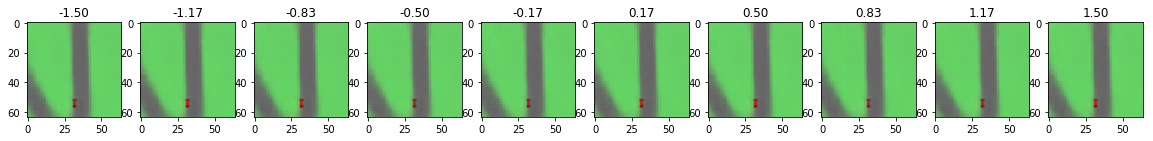

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


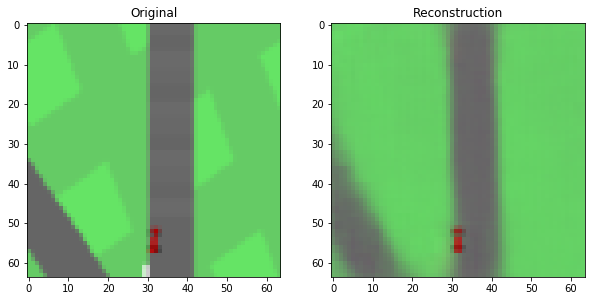

Visualise latent factor 25, original value=0.01


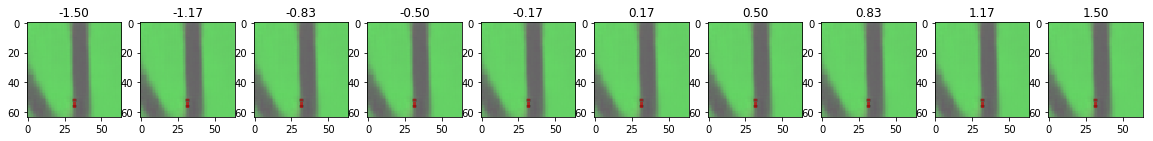

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


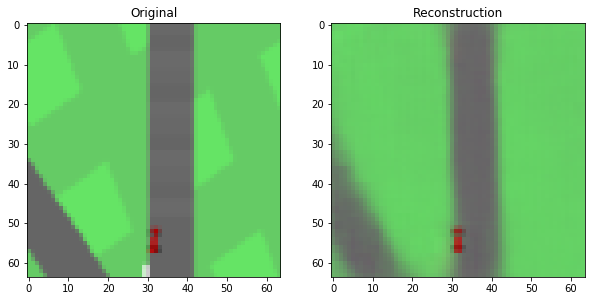

Visualise latent factor 26, original value=-0.01


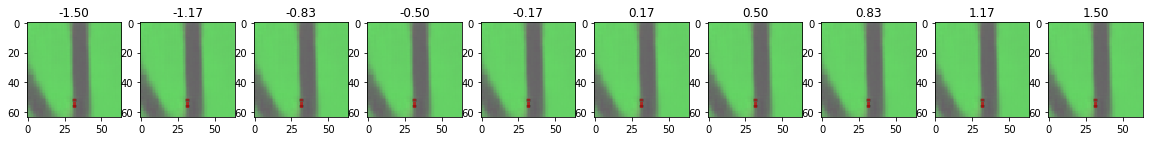

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


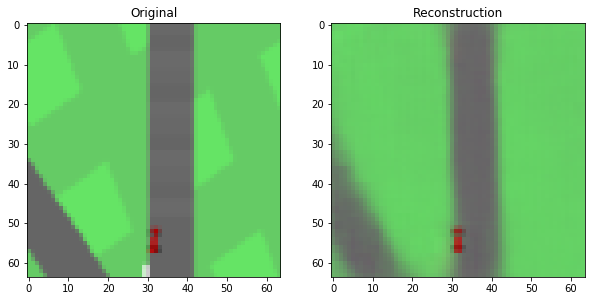

Visualise latent factor 27, original value=0.08


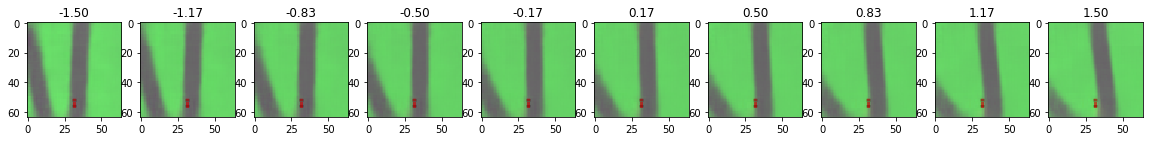

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


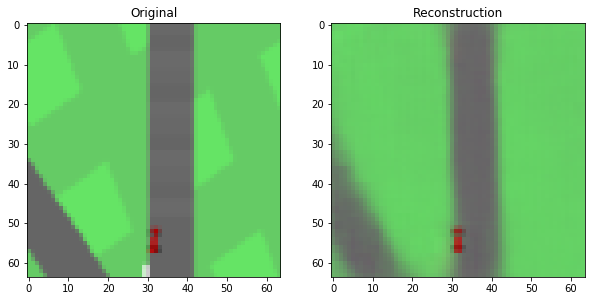

Visualise latent factor 28, original value=0.04


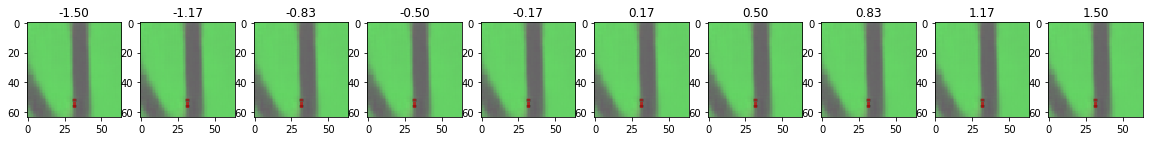

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


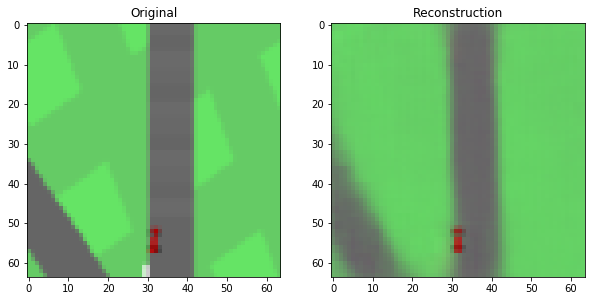

Visualise latent factor 29, original value=-0.02


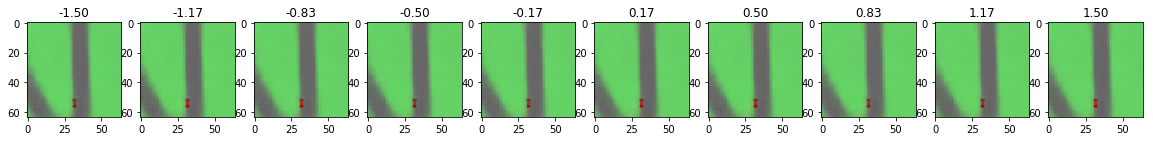

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


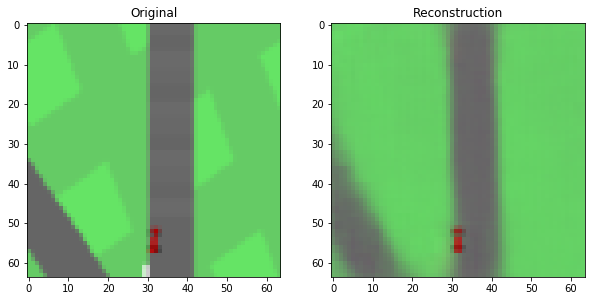

Visualise latent factor 30, original value=0.03


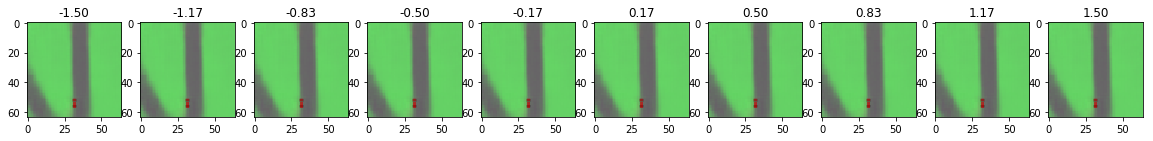

Latent vector z
[ 0.0186  0.0105 -0.024   0.0047 -0.0195  0.0073 -0.005  -0.4939  1.0769 -0.0053  0.0062  0.0009
 -0.0008  2.2198  0.0058 -0.0024  0.6546  0.0097 -0.0325  0.0079 -0.0002 -0.0357  0.0088  0.012
  0.0083  0.0065 -0.0069  0.0849  0.0449 -0.0233  0.0299 -0.0262]


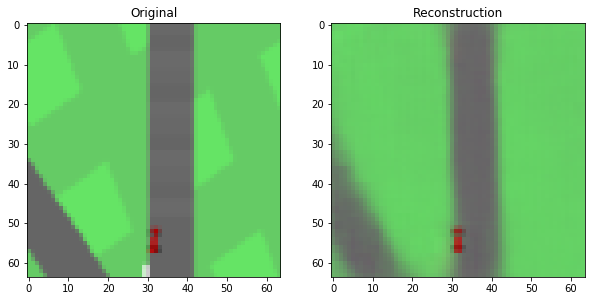

Visualise latent factor 31, original value=-0.03


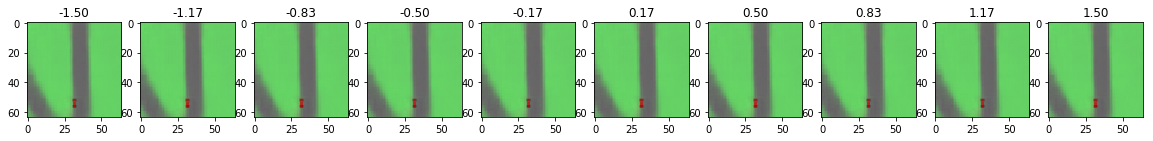

In [15]:
for i in range(32):
    plot_latent_variations(frame, beta_vae, factor=i)

## Behaviour characterisation

In [5]:
model = make_model(model_name='beta5')
model.load_model('carracing.cma.vae_beta_5.0.16.40.best.json')

INFO:tensorflow:Model using cpu.
model using cpu
input dropout mode = False
output dropout mode = False
recurrent dropout mode = False
loading file /data/cvfs/ah2029/datasets/gym/carracing/log/carracing.cma.vae_beta_5.0.16.40.best.json


In [6]:
model.make_env()

In [19]:
obs = np.load(os.path.join(DATA_DIR, random.choice(filelist)))["obs"]

ValueError: cannot reshape array of size 12288000 into shape (1,64,64,3)

In [7]:
train_mode=False
render_mode=False
num_episode=1

reward_list = []
t_list = []

max_episode_length = 1000


for episode in range(num_episode):
    model.reset()

    obs = model.env.reset()

    total_reward = 0.0
    
    recording_mu = []
    recording_h = []
    recording_logvar = []
    recording_action = []
    recording_reward = [0]

    for t in range(max_episode_length):
        if render_mode:
            model.env.render("human")
        else:
            model.env.render('rgb_array')

        z, mu, logvar = model.encode_obs(obs)
        action = model.get_action(z)

        recording_mu.append(mu)
        # here we append the next state h
        recording_h.append(model.state.h[0])
        recording_logvar.append(logvar)
        recording_action.append(action)

        obs, reward, done, info = model.env.step(action)

        extra_reward = 0.0 # penalize for turning too frequently
        recording_reward.append(reward)
        total_reward += reward
        if done:
            break

if render_mode:
    print("total reward", total_reward, "timesteps", t)
reward_list.append(total_reward)
t_list.append(t)
print(reward_list)

Track generation: 1063..1334 -> 271-tiles track
total reward 533.3333333333178 timesteps 999
[533.3333333333178]


In [13]:
np.stack(recording_h, axis=0).mean(axis=0)

array([ 0.1814,  0.2967, -0.3032,  0.1037, -0.0377, -0.0318, -0.0392,  0.0743,  0.1945, -0.0007,
       -0.1782, -0.1202,  0.4954,  0.0925,  0.0072,  0.0597,  0.3906, -0.1271,  0.2954, -0.0795,
       -0.0052, -0.0172,  0.2752,  0.0473, -0.1416, -0.0703,  0.0912, -0.4369,  0.1894, -0.4652,
        0.015 , -0.1483,  0.2429, -0.1827, -0.1282, -0.0324, -0.1107, -0.2596,  0.2121,  0.2052,
       -0.0557, -0.0904,  0.0255, -0.0357,  0.453 , -0.1812,  0.0821,  0.03  , -0.5519,  0.0415,
       -0.0573,  0.5087, -0.1973, -0.0369, -0.0557,  0.2579, -0.1995,  0.0243,  0.1297, -0.0126,
       -0.267 ,  0.1645, -0.0189,  0.1179, -0.768 , -0.2583,  0.4246, -0.3069, -0.3287,  0.1966,
       -0.3797, -0.2402,  0.3481, -0.2553, -0.1503, -0.0197, -0.0699, -0.2291,  0.0349,  0.2823,
       -0.0008,  0.3469, -0.098 ,  0.1347,  0.0166, -0.1692, -0.1763,  0.0124, -0.1536, -0.4609,
       -0.2823,  0.0876,  0.0251,  0.1035,  0.3309,  0.4291, -0.0346,  0.0128,  0.0011, -0.3325,
        0.2302,  0.0816,  0.08

In [14]:
from sklearn.neighbors import NearestNeighbors

In [41]:
neighbors = NearestNeighbors(3, metric='euclidean')

In [42]:
array = np.array([1, 2, 10, 12, 20, 40]).reshape((-1, 1))
neighbors.fit(array)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='euclidean',
         metric_params=None, n_jobs=None, n_neighbors=3, p=2, radius=1.0)

In [43]:
neighbors.kneighbors([[3]])

(array([[1., 2., 7.]]), array([[1, 0, 2]]))